# <a id='toc1_'></a>[Boston house price prediction](#toc0_)

刘天润 SC24219058

**Table of contents**<a id='toc0_'></a>    
- [Boston house price prediction](#toc1_)    
  - [Data analysis](#toc1_1_)    
    - [Exploratory Data Analysis](#toc1_1_1_)    
    - [Univariate analysis](#toc1_1_2_)    
    - [Bivariate Analysis](#toc1_1_3_)    
    - [Split the dataset](#toc1_1_4_)    
  - [Model Building](#toc1_2_)    
    - [Linear Regression Model](#toc1_2_1_)    
    - [Check performance](#toc1_2_2_)    
    - [Neural Network](#toc1_2_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Import libraries

In [327]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Import library for preparing data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## <a id='toc1_1_'></a>[Data analysis](#toc0_)

load data

In [328]:
df = pd.read_excel("BostonHousingData.xlsx")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.
There are 13 columns in the dataset and every column is of numeric data type.

### <a id='toc1_1_1_'></a>[Exploratory Data Analysis](#toc0_)

In [329]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### <a id='toc1_1_2_'></a>[Univariate analysis](#toc0_)

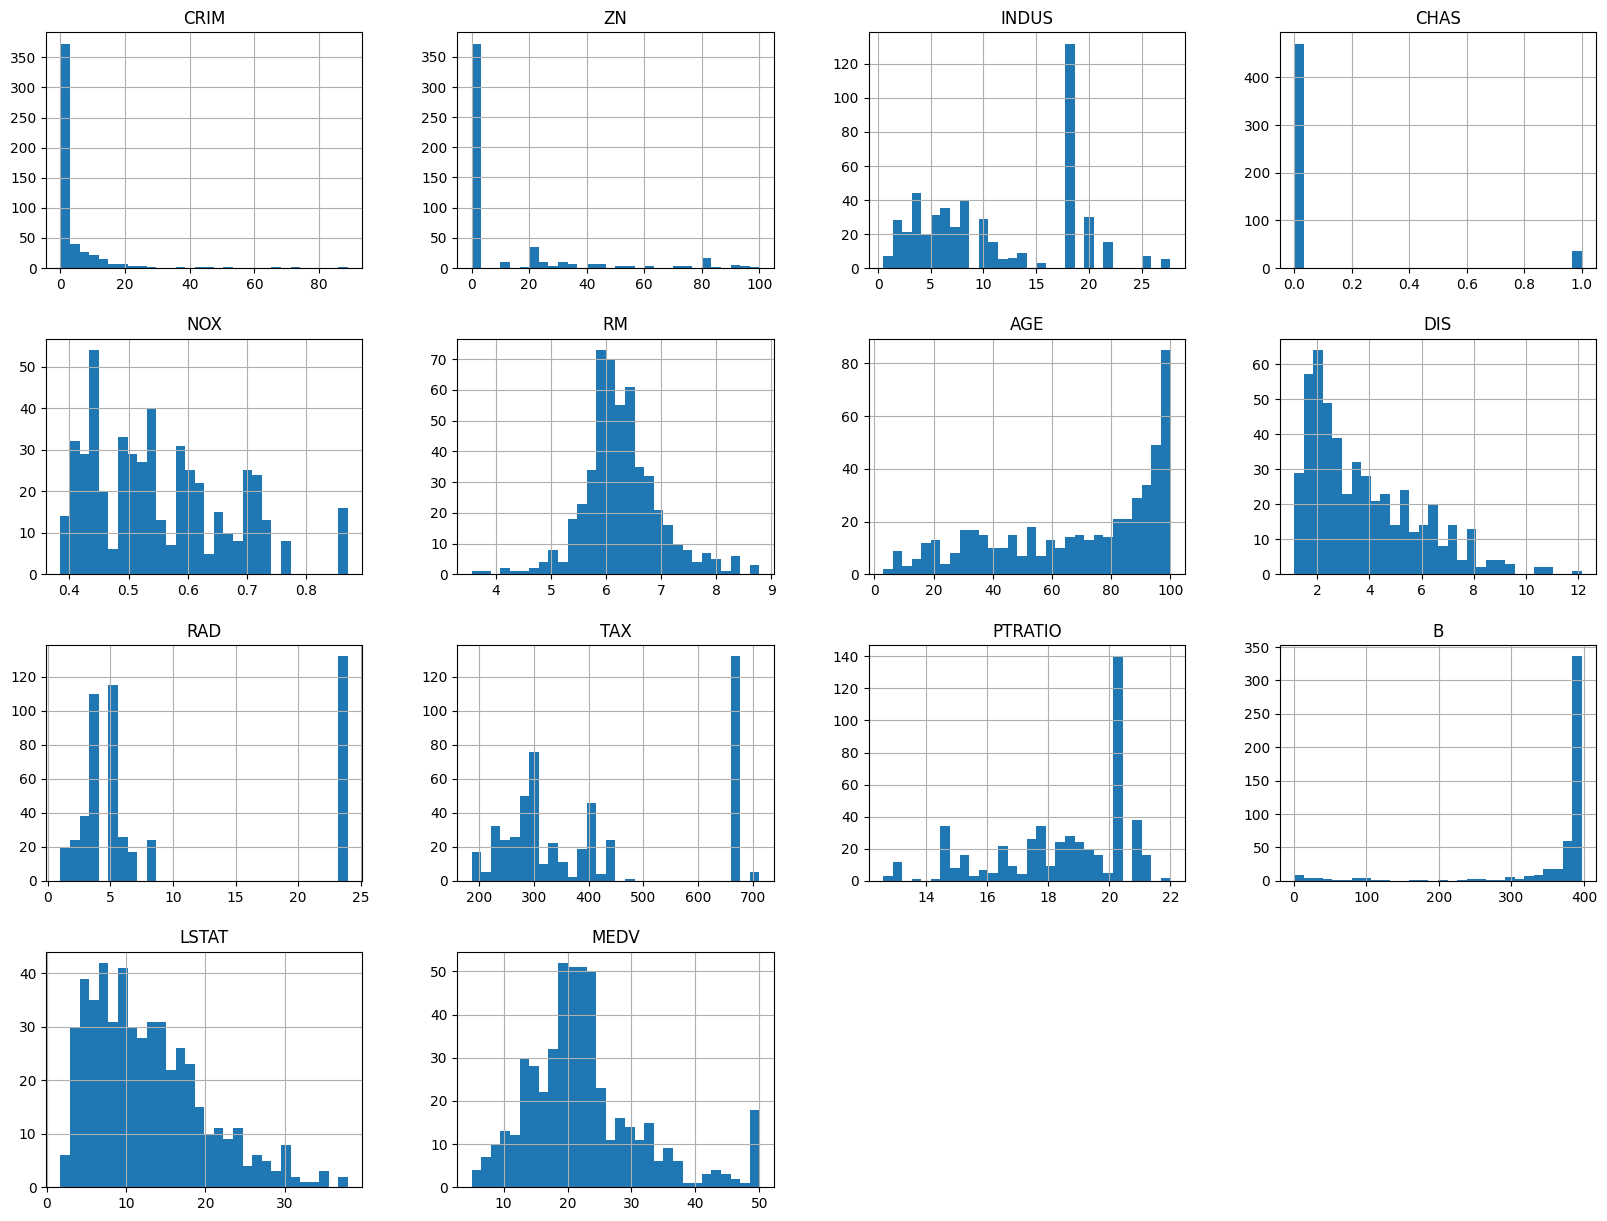

In [330]:
df.hist(bins=30, figsize=(20,15))
plt.show()

MEDV: Median value of owner-occupied homes in 1000 dollars
Slightly skewed. As this is our dependent variable will need to take action to __normalize__ it.

Least squares regression models assume the residuals are normal, and a non-normal dependent variable will produce non-normal residual errors. Therefore, as the dependent variable is sightly skewed, we need to apply a log transformation on the 'MEDV' column and check the distribution of the transformed column.

Note: Using methods like quantile regression and robust regression can use non-normal dependent variables.

<Axes: xlabel='MEDV_log', ylabel='Count'>

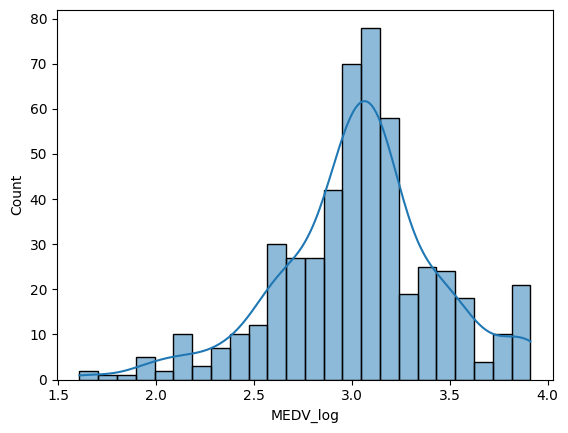

In [331]:
df['MEDV_log'] = np.log(df['MEDV'])
sns.histplot(data = df, x = 'MEDV_log', kde = True)

The log-transformation (MEDV_log) appears to have a nearly normal distribution without skew, therefore we can proceed.

### <a id='toc1_1_3_'></a>[Bivariate Analysis](#toc0_)

Check the correlation using heatmap

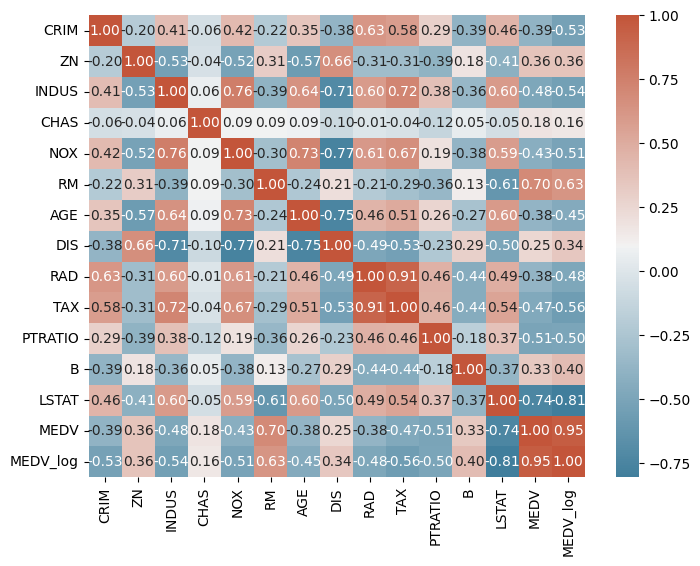

In [332]:
plt.figure(figsize = (8, 6))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

__Strong correlations__ (>= 0.7 or <= -0.7) between MEDV_log and:

LSTAT: Negative Correlation 

__Strong correlations__ (>= 0.7 or <= -0.7) not involving our dependent variable:

Positive Correlation between NOX and INDUS. Positive Correlation between NOX and AGE. 

Negative Correlation between DIS and INDUS, DIS and NOX, DIS and AGE. 

Positive Correlation between TAX and INDUS. Very high Positive Correlation between TAX and RAD.

We can reduce the complexity of the model and improve its performance by dropping some highly related features.

### <a id='toc1_1_4_'></a>[Split the dataset](#toc0_)

Split the data into the dependent and independent variables and further split it into train and test set in a ratio of 9:1 for train and test sets.

In [333]:
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

Intercept Term: allows the regression line to be shifted up or down on the y-axis to better fit the data. The value of the intercept term can be interpreted as the expected value of the dependent variable when all independent variables are set to zero.

In [334]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10, random_state = 1)

# drop highly related features
X_train.drop(columns={'TAX','NOX','DIS'})


,const,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,PTRATIO,B,LSTAT
242,1.0,0.10290,30.0,4.93,0,6.358,52.9,6,16.6,372.75,11.22
5,1.0,0.02985,0.0,2.18,0,6.430,58.7,3,18.7,394.12,5.21
168,1.0,2.30040,0.0,19.58,0,6.319,96.1,5,14.7,297.09,11.10
490,1.0,0.20746,0.0,27.74,0,5.093,98.0,4,20.1,318.43,29.68
62,1.0,0.11027,25.0,5.13,0,6.456,67.8,8,19.7,396.90,6.73
...,...,...,...,...,...,...,...,...,...,...,...
255,1.0,0.03548,80.0,3.64,0,5.876,19.1,1,16.4,395.18,9.25
72,1.0,0.09164,0.0,10.81,0,6.065,7.8,4,19.2,390.91,5.52
396,1.0,5.87205,0.0,18.10,0,6.405,96.0,24,20.2,396.90,19.37
235,1.0,0.33045,0.0,6.20,0,6.086,61.5,8,17.4,376.75,10.88


## <a id='toc1_2_'></a>[Model Building](#toc0_)

### <a id='toc1_2_1_'></a>[Linear Regression Model](#toc0_)


In [335]:
# Create the model using ordinary least squared
model1 = sm.OLS(y_train,X_train).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     125.4
Date:                Wed, 02 Apr 2025   Prob (F-statistic):          6.20e-139
Time:                        22:34:25   Log-Likelihood:                 112.88
No. Observations:                 455   AIC:                            -197.8
Df Residuals:                     441   BIC:                            -140.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1763      0.216     19.344      0.000       3.752       4.601
CRIM          -0.0105      0.001     -7.819      0.000      -0.013      -0.008
ZN             0.0015      0.001      2.409      0.016       0.000       0.003
INDUS          0.0018      0.003      0.697      0.486      -0.003       0.007
CHAS           0.1008      0.036      2.811      0.005       0.030       0.171
NOX           -0.8260      0.163     -5.068      0.000      -1.146      -0.506
RM             0.0849      0.018      4.718      0.000       0.050       0.120
AGE            0.0002      0.001      0.378      0.706      -0.001       0.001
DIS           -0.0525      0.009     -6.084      0.000      -0.070      -0.036
RAD            0.0147      0.003      5.189      0.000       0.009       0.020
TAX           -0.0006      0.000     -3.948      0.000      -0.001      -0.000
PTRATIO       -0.0371      0.006     -6.723      0.000      -0.048      -0.026
B              0.0004      0.000      3.125      0.002       0.000       0.001
LSTAT         -0.0286      0.002    -13.352      0.000      -0.033      -0.024
==============================================================================
Omnibus:                       52.314   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.743
Skew:                           0.423   Prob(JB):                     2.11e-45
Kurtosis:                       6.184   Cond. No.                     1.50e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared  is at 78.7%, not bad but can be improved.

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. 

### <a id='toc1_2_2_'></a>[Check performance](#toc0_)

1. Check for mean of residuals

In [336]:
residuals = model1.resid

np.mean(residuals)

2.4063779052424823e-15

The mean of residuals approach 0 hence satisfied the assumption

2. Check for homoscedasticity

In [337]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

[('F statistic', 1.1609356413798142), ('p-value', 0.13816348189672661)]

Since the p-value > 0.05, we cant reject the Null-Hypothesis.

3. Linearity of variables
   
Goldfeld-Quandt Test: This test involves dividing the data into two subgroups based on a selected variable and then comparing the variances of the residuals in these subgroups. In Python, you can use het_goldfeldquandt from the statsmodels.stats.diagnostic module. If the variances in the two subgroups are significantly different, it suggests heteroscedasticity.

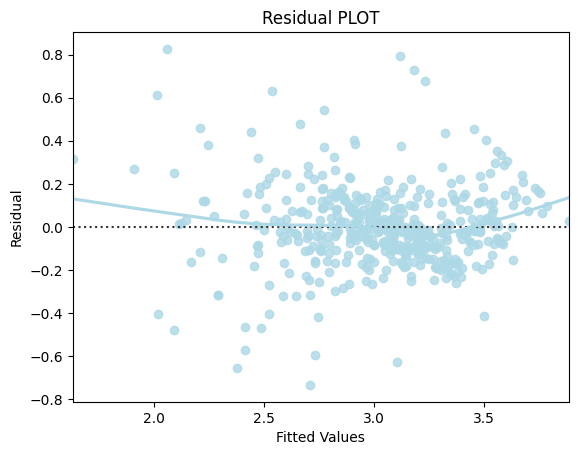

In [338]:
# Predicted values
fitted = model1.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

There is no pattern in the residual vs fitted values, therefore the assumption is satesfied.


    Data        MSE
0  Train  19.084023
1   Test  16.959608


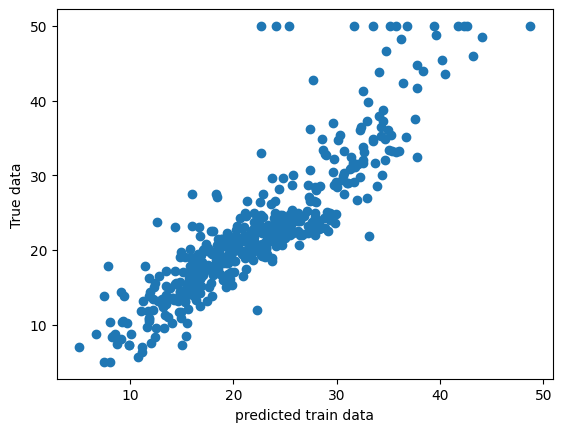

In [339]:
# RMSE
def mse(predictions, targets):
    return ((targets - predictions) ** 2).mean()

# Model Performance on test and train data
def model_perf(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_true_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_true_test = y_test
    
    plt.scatter(np.e**y_pred_train, np.e**y_true_train)
    plt.xlabel('predicted train data')
    plt.ylabel('True data')
    # plt.scatter(y_pred_train,y_true_train)

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "MSE": [
                    mse(np.exp(y_pred_train), np.exp(y_true_train)),
                    mse(np.exp(y_pred_test), np.exp(y_true_test)),
                    # mse(y_pred_train,y_true_train)
                ],
            
            }
        )
    )


# Checking model performance

model_perf(model1, X_train, X_test) 


Conclusion:

The train and test RMSE are very close, therefore our model is __not overfitted and generalizes well__.

### <a id='toc1_2_3_'></a>[Neural Network](#toc0_)



import libraries 

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
import torch.utils.data as data
from torch import optim
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


Make train and test dataset

In [388]:
y = df['MEDV']
X = df.drop(columns = {'MEDV', 'MEDV_log'})

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
n_samples, n_features = X.shape

Feature Scaling

In [389]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [377]:
# dataset = pd.read_excel("BostonHousingData")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
np.random.seed(21)
torch.manual_seed(21)

Load data in batch size

In [411]:
def load_array(data_arrays, batch_size, is_train=True): 
    # 构造一个PyTorch数据迭代器
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 25
# transform data type
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)  

print(X_train_tensor.size())
data_iter = load_array((X_train_tensor, y_train_tensor), batch_size)
test_loader=load_array((X_test_tensor,y_test_tensor),batch_size)

torch.Size([379, 13])


In [412]:
# network model
class Model(nn.Module):
    def __init__(self, n_features, hiddenA, hiddenB):
        super(Model, self).__init__()
        self.linearA = nn.Linear(n_features, hiddenA)
        self.linearB = nn.Linear(hiddenA, hiddenB)
        self.linearC = nn.Linear(hiddenB, 1)

    def forward(self, x):
        yA = F.relu(self.linearA(x))
        yB = F.relu(self.linearB(yA))
        return self.linearC(yB)

In [413]:
#定义NN 输入、隐层A、B数
net = Model(n_features, 50,20)
     
# loss function
loss = nn.MSELoss()

#定义优化算法
trainer = torch.optim.Adam(net.parameters(), lr=0.01)


epoch 1, loss 133.650665
epoch 2, loss 35.642647
epoch 3, loss 24.640808
epoch 4, loss 20.804642
epoch 5, loss 17.133854
epoch 6, loss 16.508598
epoch 7, loss 14.162142
epoch 8, loss 14.863050
epoch 9, loss 14.997805
epoch 10, loss 12.452974
epoch 11, loss 12.232576
epoch 12, loss 11.080355
epoch 13, loss 12.603107
epoch 14, loss 14.455299
epoch 15, loss 10.725929
epoch 16, loss 11.610527
epoch 17, loss 10.013349
epoch 18, loss 10.084371
epoch 19, loss 9.995999
epoch 20, loss 9.288238
epoch 21, loss 10.553692
epoch 22, loss 9.592346
epoch 23, loss 9.366555
epoch 24, loss 8.857218
epoch 25, loss 8.805732
epoch 26, loss 10.297166
epoch 27, loss 12.019534
epoch 28, loss 9.245355
epoch 29, loss 8.575552
epoch 30, loss 9.594297
epoch 31, loss 8.267275
epoch 32, loss 8.017162
epoch 33, loss 8.564269
epoch 34, loss 8.201659
epoch 35, loss 7.681347
epoch 36, loss 7.653120
epoch 37, loss 7.473113
epoch 38, loss 7.728293
epoch 39, loss 7.168714
epoch 40, loss 7.733621
epoch 41, loss 7.192859
epo

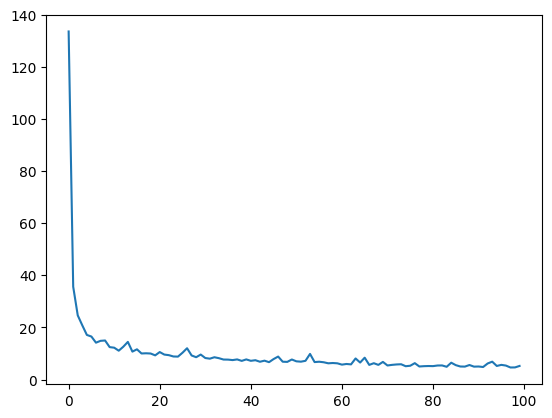

In [414]:

num_epochs = 100
all_losses=[]
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(X_train_tensor), y_train_tensor)
    print(f'epoch {epoch + 1}, loss {l:f}')
    all_losses.append(l)

all_losses_np = torch.tensor(all_losses).detach().numpy()
plt.plot(all_losses_np)

MAE: 2.485722


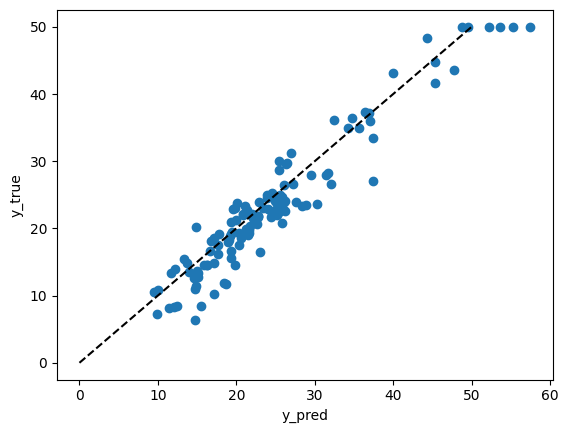

In [416]:
y_pred = []
y_true = []
net.train(False)
for inputs, targets in test_loader:
    y_pred.extend(net(inputs).data.numpy())
    y_true.extend(targets.numpy())
plt.scatter(y_pred, y_true)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.plot([0, 50], [0, 50], '--k')
print("MAE:", mean_absolute_error(y_true, y_pred))